# Deep learning and AI methods
## Session 2: Classification of cloth images
* Instructor: [Krzysztof Podgorski](https://krys.neocities.org),  [Statistics, Lund University, LUSEM](https://www.stat.lu.se/)
* For more information visit the [CANVAS class website](https://canvas.education.lu.se/courses/1712).

In this session we learn some basic about *TensorFlow* and *Keras* by solving an example of immage recognition problem.

## Project 1 Exploring the set of clothing images

This project trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [289]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Importing Tensorflor and keras
import tensorflow as tf
from tensorflow import keras

# Other libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


#### Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [290]:
# Importing the data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Checking so that it got loaded
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.

#### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [291]:
# Some different commands relating to size, shape, etc.
print(f'The training set contains', len(train_images), 'images.')
print(f'The test set contains', len(test_images), 'images.')
print(f'The training set has', np.unique(train_labels).size, 'unique values out of totally', train_labels.size, 'labels.')

The training set contains 60000 images.
The test set contains 10000 images.
The training set has 10 unique values out of totally 60000 labels.


In [292]:
# Checking the first 28*28 pixel data point
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

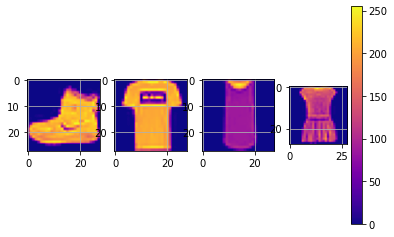

In [293]:
# Importing some plotting features
from pylab import cm

plt.figure()

# Plotting first observation
plt.subplot(141)
plt.imshow(train_images[0], cmap = cm.plasma)
plt.grid(True)

# Plotting second observation
plt.subplot(142)
plt.imshow(train_images[1], cmap = cm.plasma)
plt.grid(True)

# Plotting third observation
plt.subplot(143)
plt.imshow(train_images[2], cmap = cm.plasma)
plt.grid(True)

# Plotting fourth observation
plt.subplot(144)
plt.imshow(train_images[3], cmap = cm.plasma)
plt.grid(True)

plt.colorbar()

plt.show()

In the data we see the object `array`. It is an enhanced version of the matrix that comes in the `numpy` library. 
Let us practice a bit with arrays. 

In [294]:
# Practicing arrays
ua1 = [[5, 4, 6, 2, 3], [1, 2, 1, 1, 1]]
print(ua1)
print(type(ua1)) # Easy way to check data type of a variable (for some reason it calls it list)
ua2 = np.array(ua1)
print(ua2)
print(type(ua2))

print(ua2[0:2, 0:2])
print(ua2[:, :]) # So : means 'all'

[[5, 4, 6, 2, 3], [1, 2, 1, 1, 1]]
<class 'list'>
[[5 4 6 2 3]
 [1 2 1 1 1]]
<class 'numpy.ndarray'>
[[5 4]
 [1 2]]
[[5 4 6 2 3]
 [1 2 1 1 1]]


We note a rather unusual convention that the right-hand-side end of the index range is treated as exclusive. Next, learn how to extract parts of the matrices. We also introduce the `for`-loop and related function `range`.

In [295]:
# Extracting one instance from the training set
tr = train_images[1]

# Checking the 20th to 21st element in both dimensions
tr[20:22,20:22]

array([[217, 105],
       [213, 115]], dtype=uint8)

In [296]:
# Checking the mean
np.mean(tr[20:22, 20:22])

162.5

In [297]:
# Checking a few more things
print(f'Variance:', np.var(tr[20:22, 20:22]))
print(f'Max:', np.max(tr[20:22, 20:22]))
print(f'Min:', np.min(tr[20:22, 20:22]))
print(f'Second matrix norm:', np.linalg.norm(x = tr[20:22, 20:22], ord = 2))

Variance: 2770.75
Max: 217
Min: 105
Second matrix norm: 341.5413503931434


In [298]:
# Creating a 14 * 14 null matrix
reim = np.zeros((14, 14))
print(reim[5:10, 5:10])

# Inserting the mean from part of tr matrix into the (5,5) place in the reim matrix
reim[5,5] = np.mean(tr[20:22, 20:22])
print(reim[5:6, 5:6])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[162.5]]


In [299]:
# Nested for loop practice with matrix
for i in range(14): 
    for j in range(14):
        print(tr[(2*i):(2*i+2),(2*j):(2*j+2)])

[[0 0]
 [0 0]]
[[0 0]
 [0 1]]
[[0 1]
 [0 0]]
[[ 0  0]
 [ 0 49]]
[[  0   0]
 [136 219]]
[[ 41 188]
 [216 228]]
[[103  54]
 [236 255]]
[[ 48  43]
 [255 255]]
[[ 87 168]
 [255 217]]
[[133  16]
 [215 254]]
[[  0   0]
 [231 160]]
[[ 0  0]
 [45  0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[  0  14]
 [  0 188]]
[[176 222]
 [219 200]]
[[224 212]
 [198 202]]
[[203 198]
 [198 199]]
[[196 200]
 [199 201]]
[[215 204]
 [196 198]]
[[202 201]
 [198 200]]
[[201 201]
 [200 200]]
[[209 218]
 [200 201]]
[[224 164]
 [200 225]]
[[ 0  0]
 [41  0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[ 51 219]
 [116 226]]
[[199 203]
 [206 204]]
[[203 212]
 [207 204]]
[[238 248]
 [101  75]]
[[250 245]
 [ 47  73]]
[[249 246]
 [ 48  50]]
[[247 252]
 [ 45  51]]
[[248 235]
 [ 63 113]]
[[207 203]
 [222 202]]
[[203 222]
 [206 220]]
[[140   0]
 [224   0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[200 222]
 [247 218]]
[[209 203]
 [212 210]]
[[215 200]
 [215 214]]
[[  0  70]
 [  0 254]]
[[ 98   0]
 

In [300]:
# Small experiment
my_matrix = np.array([[1, 1, 1, 1, 1], 
                      [2, 2, 2, 2, 2], 
                      [3, 3, 3, 3, 3], 
                      [4, 4, 4, 4, 4], 
                      [5, 5, 5, 5, 5]])
print(my_matrix)

for i in range(len(my_matrix)):
    print(f'Row', i+1, 'is', my_matrix[i])

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
Row 1 is [1 1 1 1 1]
Row 2 is [2 2 2 2 2]
Row 3 is [3 3 3 3 3]
Row 4 is [4 4 4 4 4]
Row 5 is [5 5 5 5 5]


Sometimes it is convenient to place some collection of objects in the form of a list. Here is how we can create such lists.

In [301]:
middle=[]
print(middle)

middle.append(tr[20:22,20:22])
print(middle)
middle.extend([tr[20:22,22:28],tr[20:22,28:34]])
print(middle)

print(middle[2]) 

# Checking the first object, which is the first matrix we inserted
print(middle[0])

# Adding another object
middle.append(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))

# Printing the last object in the list
print(middle[len(middle)-1])

[]
[array([[217, 105],
       [213, 115]], dtype=uint8)]
[array([[217, 105],
       [213, 115]], dtype=uint8), array([[0, 2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0]], dtype=uint8), array([], shape=(2, 0), dtype=uint8)]
[]
[[217 105]
 [213 115]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Finally, if we want collect matrices of the same sizes it is better to keep them in the form of arrays. Notice the difference between lists of matrices and three dimensional matrices. The latter are also more efficiently handled in computations. 

In [302]:
middle1=np.zeros((3,2,2))
print(middle1)

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


In [303]:
print('This is what we want to insert into the 3-dim matrix:')
print(tr[20:22, 20:22])
# Inserting the above 2*2 matrix into the 3-dim matrix, in the first 'spot'
middle1[0, 0:2, 0:2] = tr[20:22, 20:22]
print('This is what the 3-dim matrix looks now:')
print(middle1)

This is what we want to insert into the 3-dim matrix:
[[217 105]
 [213 115]]
This is what the 3-dim matrix looks now:
[[[217. 105.]
  [213. 115.]]

 [[  0.   0.]
  [  0.   0.]]

 [[  0.   0.]
  [  0.   0.]]]


### Task 1:

The data dimension in the clothin data example is 784. Reduce the data dimension by merging four neighboring pixels into one and averaging the corresponding values of pixels so that the dimension of the reduced data is 196. Plot examples of the obtained images. Keep in mind the creating a new data set of the reduced resolution will take some computing time.

#### Solution
First, I'll check how many dimensions we should should end up with after our transformation of the data. Then I'll try and write a fuunction that transform the data the way we want. Fortunately, I can use one of the loops from earlier for this. However this time I also need to loop over the 60 000 observations.

In [304]:
# If 28*28 = 784, then sqrt(196) should give us the new x*x dimensions
np.sqrt(196)

14.0

In [305]:
# Function for dimension reduction

def dim_reduction(original_matrix, new_dim):
    # Checking how many observations to go through
    nr_observations = len(original_matrix)
    
    # Creating empty matrix of the wanted form
    merged_matrix = np.zeros((nr_observations, new_dim, new_dim))
    
    # Creating variable to use when we loop over the matrices
    multiplier = np.int(28/new_dim)
    
    # Looping over observations and merging
    for nr in range(nr_observations):
        for i in range(len(merged_matrix[0])):
            for j in range(len(merged_matrix[0])):
                merged_matrix[nr, i, j] = np.mean(original_matrix[nr, (multiplier*i):(multiplier*i+multiplier),(multiplier*j):(multiplier*j+multiplier)])
                
    return merged_matrix

In [306]:
%%time
# New data with reduced dimensions
train_images_2 = dim_reduction(train_images, 14)

CPU times: user 2min 34s, sys: 1.65 s, total: 2min 36s
Wall time: 2min 59s


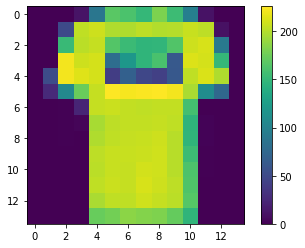

In [307]:
# Checking so it went ok
plt.figure()
plt.imshow(train_images_2[1])
plt.colorbar()
plt.grid(False)
plt.show()

*Comment*: This went well, apart the fact that it took very long to transform the data. However, that's probably because my computer is a bit old.

### Task 2:

Cross-validation is a method of checking performance of different methods on some subsamples of the training data to decide for a best performing model among a number of them under consideration. For the so-called $k$-fold crossvalidation, one splits the training data into $k$ equal sized portions using random sampling. One can utilize for the purpose the following random permutation function and Python list reshaping methods.

#### Solution
For creation of CV-sets, see cell right before task 3.

In [308]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [309]:
perm = np.random.permutation(12)
print(perm)
rearr = perm.reshape(4, 3)
print(rearr)

[ 2  7 11  0  8  4  9 10  6  3  5  1]
[[ 2  7 11]
 [ 0  8  4]
 [ 9 10  6]
 [ 3  5  1]]


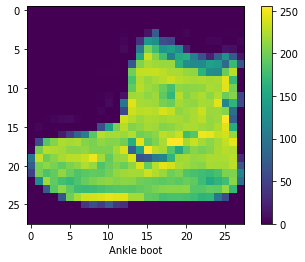

In [310]:
small_images = train_images[rearr]
small_labels = train_labels[rearr]

plt.figure()
plt.imshow(small_images[1][0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[small_labels[1][0]])
plt.show()

Thus rearrangement to 10 batches of the training data could start with the following command.

In [311]:
perm = np.random.permutation(len(train_images))
rearr = perm.reshape(10, int(len(train_images)/10))

#### Further description of the data

The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [312]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [313]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [314]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [315]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [316]:
len(test_labels)

10000

#### Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

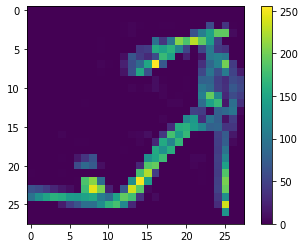

The smallest value in this pixel grid is 0
The largest value in this pixel grid is 255


In [317]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

# Checking more precisely for the min and max value
print(f'The smallest value in this pixel grid is', train_images[8].min())
print(f'The largest value in this pixel grid is', train_images[8].max())

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [318]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Checking so it worked
print(f'The smallest value in this scaled pixel grid is', train_images[8].min())
print(f'The largest value in this scaled pixel grid is', train_images[8].max())

The smallest value in this scaled pixel grid is 0.0
The largest value in this scaled pixel grid is 1.0


To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

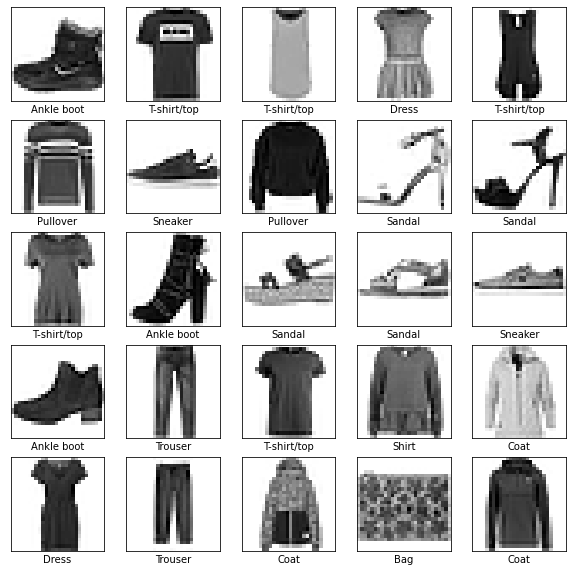

In [319]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [320]:
# Creating cross-validation sets
perm = np.random.permutation(len(train_images))
rearr = perm.reshape(10, int(len(train_images)/10))

# Dividing the data into these batches
CV_images = train_images[rearr]
print(CV_images.shape)
print(len(CV_images))

# Dividing the labels the same way
CV_labels = train_labels[rearr]
print(CV_labels.shape)
print(len(CV_labels))

(10, 6000, 28, 28)
10
(10, 6000)
10


### Task 3:

Prepare ten cross-validation data sets for  the 10 fold cross validation method using the partition of the data obtained in Task 2. In each of the set you should have 90% data for the training and 10% for testing. 

#### Solution
I'm not sure I understand the task here. We shouldn't really need to create 10 new datasets containing basically the same information as CV_images and CV_labels alreadt holds. We should be able to iterate over that set using a different fold for testing each time. I've written some code that fixes this pretty smoothly.

In [469]:
all_train = []
all_train_labels = []
all_val = [] # Naming this validation so that we don't mix it up with test data
all_val_labels = []

for i in range(len(CV_images)):
    val = CV_images[i]
    val_labels = CV_labels[i]
    train = np.delete(CV_images, i, axis = 0)
    train_label = np.delete(CV_labels, i, axis = 0) # Fixa så att den här fungerar
    all_val.append(val)
    all_val_labels.append(val_labels)
    all_train.append(train)
    all_train_labels.append(train_label)

In [470]:
# Function to fetch the dataset you're interested in
def fetch_my_data(nr = 1):
    train_data = all_train[nr-1].reshape(9*6000, 28, 28)
    return train_data, all_val[nr-1]

def fetch_my_labels(nr = 1):
    train_labels = all_train_labels[nr-1].reshape(9*6000)
    return train_labels, all_val_labels[nr-1]

# For example fetching training and test set where fold 5 is test set
CV5_train, CV5_val = fetch_my_data(nr = 5)
CV5_train_labels, CV5_val_labels = fetch_my_labels(nr = 5)

*Comment*: The indexing of Python makes it a little unintuitive here. Basically by fifth fold I mean the fifth fold we made, which will be at index 4 due to Python indexing from 0. 

### Task 4:

Print images of the first picture in each of the ten batches created for the cross-validation purposes. 

#### Solution
I'm assuming what is meant here is the first picture of each fold. Each "dataset" defined above still contains the same first picture. (Or more specifically, all training sets except the first one will contain the same picture.

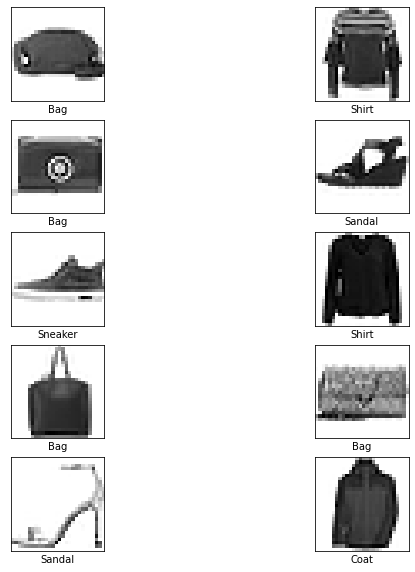

In [323]:
plt.figure(figsize=(10,10))
for i in range(len(CV_images)):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(CV_images[i][0], cmap=plt.cm.binary)
    plt.xlabel(class_names[CV_labels[i][0]])
plt.show()

## Project 2 -- Classification using the maximum likelihood method

After preparing the data we can now turn now to analyzing them. The first method we explore in the Gaussian likelihood method based classification. In this approach, we simply treat the data as high-dimensional vectors disregarding their spatial structure. 

We first learn how to reshape and subsample matrices (arrays). 

In [324]:
test=train_images[0:10,20:22,20:22]
print(test)

# Controlling its shape
test.shape

[[[0.85490196 0.83137255]
  [0.72941176 0.70980392]]

 [[0.85098039 0.41176471]
  [0.83529412 0.45098039]]

 [[0.14901961 0.        ]
  [0.19215686 0.        ]]

 [[0.44705882 0.34901961]
  [0.45882353 0.40784314]]

 [[0.22745098 0.        ]
  [0.38823529 0.        ]]

 [[0.19607843 0.38039216]
  [0.24705882 0.23137255]]

 [[0.12156863 0.1372549 ]
  [0.         0.        ]]

 [[0.86666667 0.87843137]
  [1.         0.75294118]]

 [[0.         0.01176471]
  [0.         0.        ]]

 [[0.         0.00784314]
  [0.         0.00784314]]]


(10, 2, 2)

In [325]:
test2=test.reshape(10,4)
test2

array([[0.85490196, 0.83137255, 0.72941176, 0.70980392],
       [0.85098039, 0.41176471, 0.83529412, 0.45098039],
       [0.14901961, 0.        , 0.19215686, 0.        ],
       [0.44705882, 0.34901961, 0.45882353, 0.40784314],
       [0.22745098, 0.        , 0.38823529, 0.        ],
       [0.19607843, 0.38039216, 0.24705882, 0.23137255],
       [0.12156863, 0.1372549 , 0.        , 0.        ],
       [0.86666667, 0.87843137, 1.        , 0.75294118],
       [0.        , 0.01176471, 0.        , 0.        ],
       [0.        , 0.00784314, 0.        , 0.00784314]])

In [326]:
tshirt

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [327]:
len(train_labels)
tshirt = train_labels==0
tshirt_images = train_images[tshirt,0:2,0:2]
tshirt_images.shape

(6000, 2, 2)

### Task 1:  

Reschape the original data to vectors and compute covariances and the means within each of ten classes. See Lab 0 for some ideas how to make computation. Plot the `average` object from each class. Use for your computation only the training data. 

#### Solution
First I'm doing it as instructed for only the t-shirts. Then I'll loop over all classes to do the same and store means and covariance in lists for easy access later on.

In [328]:
# Checking its shape again
train_images.shape

(60000, 28, 28)

In [329]:
# Reshaping images to vectors
train_images_2D = train_images.reshape(60000, 28*28)

In [330]:
# Test t-shirt
t_shirt_index = train_labels==0
t_shirt_images = train_images_2D[t_shirt_index, :]
t_shirt_mean = np.mean(t_shirt_images)
t_shirt_cov = np.cov(t_shirt_images)

In [331]:
# Checking so that numbers are reasonable
print(t_shirt_mean)
print(t_shirt_cov)
print(np.var(t_shirt_images[0,:]))
print(np.var(t_shirt_images[1,:]))
print(np.var(t_shirt_images[2,:]))

0.3256077664399088
[[0.15655464 0.04622596 0.09544376 ... 0.06601318 0.10941092 0.03925375]
 [0.04622596 0.03803338 0.06246513 ... 0.01850453 0.03770969 0.01461522]
 [0.09544376 0.06246513 0.16604678 ... 0.04431879 0.09297201 0.02500704]
 ...
 [0.06601318 0.01850453 0.04431879 ... 0.09666992 0.06173828 0.02908853]
 [0.10941092 0.03770969 0.09297201 ... 0.06173828 0.13075529 0.03592206]
 [0.03925375 0.01461522 0.02500704 ... 0.02908853 0.03592206 0.02283444]]
0.1563549540464445
0.03798486651563386
0.16583498963310814


*Comment*: The variances are pretty close to the diagonal in the covariance, as it should be, but they should actually be the same. I think this is just because of small calculation differences.

In [332]:
# Easy way to do same thing for all classes
def means_and_covs(train_labels, train_images_2D):
    # List for the means
    means = []

    # List for the covariances
    covs = []
    
    # Computing mean and cov for each item
    for i in range(10):
        index = train_labels==i
        images = train_images_2D[index]
        mean = np.mean(images, axis = 0)
        cov = np.cov(np.transpose(images))
        means.append(mean)
        covs.append(cov)
    
    return means, covs

In [333]:
means, covs = means_and_covs(train_labels, train_images_2D)

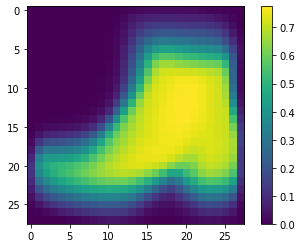

In [334]:
# Checking so it seems to be right
plt.figure()
plt.imshow(means[9].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

### Task 2:

Geting inspiration from Lab 0 and Discussion 2, the last topic, utilize the computed means and covariances to write a function that for a given image classifies it into one of the ten classes that is based on the maximum Gaussian likelihood principle. Check how this classifier performs on few selected images. 

#### Solution
The function is called 'ML_classifier' and is defined in the end of this task.

2.563116749967964e-09


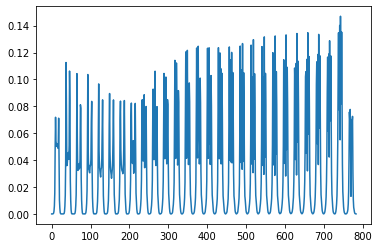

In [335]:
import matplotlib.pyplot as plt

sigma2=np.diag(covs[1])
delta=min(sigma2[sigma2>0])
print(delta)
plt.plot(sigma2)

In [336]:
# Finding the eigenvalues and eigenvectors of the boot covariance matrix
# as an example
w, v = np.linalg.eig(covs[3])

In [337]:
# Finding the real part of a complex eigenvalue
min(np.real(w))

-4.301308584663581e-17

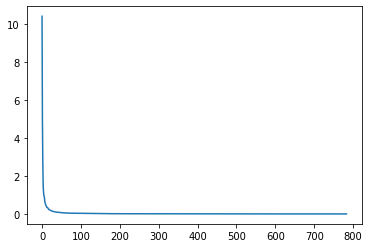

In [338]:
# Plotting all these real parts of the eigenvalues
plt.plot(np.real(w))

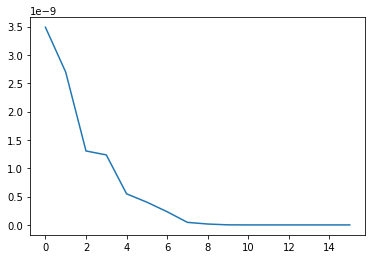

In [339]:
# Plotting the part that approaches zero
plt.plot(np.real(w[712:728]))

In [340]:
# Evaluating the inverse and computing the eigenvalues
def preceigval(Sigma):
    sigma2 = np.diag(Sigma)
    w, v = np.linalg.eig(Sigma)
    if min(sigma2) == 0 or min(w) <= 0:
        delta = min(sigma2[sigma2>0])
        Sigma = Sigma + delta * np.identity(len(sigma2)) #WTF
    w, v = np.linalg.eig(Sigma)
    precision = np.linalg.inv(Sigma)
    return precision, w

In [341]:
# Testing the function
precision_tshirt, w_tshirt = preceigval(covs[0])

# Inspecting the result
precision_tshirt

array([[ 2.45909008e+07, -4.00544382e+06,  1.42319902e+05, ...,
         7.30942235e+04, -2.13179756e+05,  3.57814229e+06],
       [-4.00544382e+06,  4.11444352e+06,  4.96541079e+04, ...,
         1.15375083e+04,  1.07419772e+05, -1.85961521e+06],
       [ 1.42319902e+05,  4.96541079e+04,  3.00143223e+05, ...,
         9.34780871e+03,  2.37577388e+04, -7.76650643e+04],
       ...,
       [ 7.30942235e+04,  1.15375083e+04,  9.34780871e+03, ...,
         5.38181971e+04, -1.81247437e+04, -7.91264277e+04],
       [-2.13179756e+05,  1.07419772e+05,  2.37577388e+04, ...,
        -1.81247437e+04,  5.70853955e+05, -1.07265377e+06],
       [ 3.57814229e+06, -1.85961521e+06, -7.76650643e+04, ...,
        -7.91264277e+04, -1.07265377e+06,  1.00262139e+07]])

In [342]:
# Computing precision and eigenvalues for all classes
def compute_precisions_and_ws(covs):
    precisions = []
    ws = []

    for i in range(10):
        precision, w = preceigval(covs[i])
        precisions.append(precision)
        ws.append(w)
        
    return precisions, ws

In [343]:
precisions, ws = compute_precisions_and_ws(covs)

In [344]:
from scipy.stats import multivariate_normal

def llGaussian1(x,mu,Sigma): 
    ll=np.log(multivariate_normal.pdf(x, mean=mu, cov=Sigma)) 
    return ll

def llGaussian(x,mu,precision,w):
    d=len(mu)
    ll=-d*np.log(2*np.pi)/2 
    ll=ll-sum(np.log(np.real(w)))/2
    ll=ll-np.dot(np.dot(x-mu,precision),x-mu)/2
    return ll

In [345]:
# Testing the new way of evaluating the log-likelihood against the old way for low dimensions. 
mu = [2, -3]
Sigma = [[1, 0], [0, 10]]

X = np.random.multivariate_normal(mu, Sigma, 500)

barX=np.mean(X, axis=0)
S=np.cov(np.transpose(X))

prec, w = preceigval(S)

print(llGaussian(X[0],barX,prec,w))
print(llGaussian1(X[0],barX,S))

-4.056237084117478
-4.056237084117477


*Comment*: Like we can see above, they perform equally.

In [346]:
def ML_classifier(x, means, precisions, ws):
    ll = np.zeros(10) # Defining an array to store the result for each class in
    for i in range(10):
        ll[i] = llGaussian(x, means[i], precisions[i], ws[i])
    return np.argmax(ll)

In [347]:
ML_classifier(means[5], means, precisions, ws)

5

In [348]:
# Testing some more cases
for i in range(10):
 print(ML_classifier(train_images_2D[i], means, precisions, ws))
 print(train_labels[i])

9
9
0
0
1
0
3
3
3
0
2
2
7
7
2
2
5
5
5
5


*Comment*: In general the ML classifier seems quite good, however in some cases it's predicting the wrong value. 

### Task 3: 

Here you should do more thoroughful evaluation of the accuracy. 
Evaluate first how the classifier performs on the training dataset by evaluating its MSE. The do the same on the testing data set. Compare the results and comment. 

In [349]:
%%time
# Getting predictions for all of the training data
hat_y = np.zeros(len(train_images_2D))
for i in range(len(train_images_2D)):
    hat_y[i] = ML_classifier(train_images_2D[i], means, precisions, ws)

CPU times: user 9min 38s, sys: 4.33 s, total: 9min 43s
Wall time: 4min 57s


In [350]:
# Checking the error rate
1 - np.mean(train_labels == hat_y)

0.29705000000000004

*Comment*: The error rate is quite high, but it's not actually awful. It's a lot better than chance. Next up we will do the same but for the test set. Here we expect the classifier to perform worse.

In [351]:
# Prepping the test data so it has the right dimensions
test_images_2D = test_images.reshape(10000, 28*28)

# Getting predictions for test set
hat_y_test = np.zeros(len(test_images_2D))

for i in range(len(test_images_2D)):
    hat_y_test[i] = ML_classifier(test_images_2D[i], means, precisions, ws)

# Evaluating the error rate
1 - np.mean(test_labels == hat_y_test)

0.33999999999999997

### Task 4:

Consider the following three modification of the approach. 

1. Reduce the data dimension by merging four neighboring pixels into one and averaging the corresponding values of pixels so that the dimension of the reduced data is 196.
2. Reduce the data dimension by merging sixteen neighboring pixels into one and averaging the corresponding values of pixels so that the dimension of the reduced data is 49.
3. Reduce the data dimension by merging forty nine neighboring pixels into one and averaging the corresponding values of pixels so that the dimension of the reduced data is 16.

Use the 10 fold cross validation method to investigate the performance of the MLE gaussian classifiers in each of the three cases as well as the full dimensional data case, and then choose the best approach based on the cross-validation. Train (estimate) the selected model on the entire training data set. Assess the performance of the best classifier on the testing data set. Which of the images where the hardest to classify and which were the easiest. Summarize your findings.  


#### Solution
In this step I'm basically going to apply everything I've done throughout the lab anew, using cross validation. For this I'm writing a function that makes use of all the functions I've specified, one cross validation set at a time. That way I can compare the error rate across the different proposed dimensions of the data.

In [495]:
def cross_validation(dimension):
    val_error_rate = []
    
    for i in range(10):
        # Get the data needed for this batch
        train_data, val_data = fetch_my_data(i)
        train_labels, val_labels = fetch_my_labels(i)
        
        # Reduce dimensions
        train_data_dr = dim_reduction(train_data, int(np.sqrt(dimension)))
        val_data_dr = dim_reduction(val_data, int(np.sqrt(dimension)))
        
        # Reshaping images to vectors
        train_images_2D = train_data_dr.reshape(len(train_data_dr), dimension)
        val_images_2D = val_data_dr.reshape(len(val_data_dr), dimension)
        
        # Compute means and covariances
        means, covs = means_and_covs(train_labels, train_images_2D)
        
        # Computing precision and eigenvalues
        precisions, ws = compute_precisions_and_ws(covs)
        
        # Getting predictions for the validation data at hand
        hat_y = np.zeros(len(val_images_2D))
        for i in range(len(val_images_2D)):
            hat_y[i] = ML_classifier(val_images_2D[i], means, precisions, ws)

        # Calculate error rate
        error_rate = 1 - np.mean(val_labels == hat_y)
        val_error_rate.append(error_rate)
        
    return np.mean(val_error_rate)

In [497]:
# First trying the function on dimension 196
cv_196 = cross_validation(196)
cv_196

0.40483333333333327

In [498]:
# Evaluating the other dimensions as well
cv_49 = cross_validation(49)
cv_16 = cross_validation(16)

In [503]:
# Full dimension (requires no dimension reduction)
val_error_rate = []
    
for i in range(10):
    # Get the data needed for this batch
    train_data, val_data = fetch_my_data(i)
    train_labels, val_labels = fetch_my_labels(i)
    
    # Reshaping images to vectors
    train_images_2D = train_data.reshape(len(train_data), 28*28)
    val_images_2D = val_data.reshape(len(val_data), 28*28)
        
    # Compute means and covariances
    means, covs = means_and_covs(train_labels, train_images_2D)
        
    # Computing precision and eigenvalues
    precisions, ws = compute_precisions_and_ws(covs)
        
    # Getting predictions for the validation data at hand
    hat_y = np.zeros(len(val_images_2D))
    for i in range(len(val_images_2D)):
        hat_y[i] = ML_classifier(val_images_2D[i], means, precisions, ws)

    # Calculate error rate
    error_rate = 1 - np.mean(val_labels == hat_y)
    val_error_rate.append(error_rate)
        
cv_full = np.mean(val_error_rate)

<BarContainer object of 4 artists>

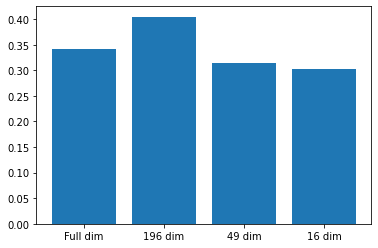

In [504]:
# Plotting the error rates for comparison
y = [cv_full, cv_196, cv_49, cv_16]
x = ['Full dim', '196 dim', '49 dim', '16 dim']
plt.bar(x, y)

## Grader box: 

In what follows the grader will put the values according the following check list:

* 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)
* 2 Have all commands been experimented with? (0 or 0.5pt)
* 3 Have all experiments been briefly commented? (0 or 0.5pt)
* 4 Have all tasks been attempted? (0, 0.5, or 1pt)
* 5 How many of the tasks have been completed? (0, 0.5, or 1pt)
* 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)
* 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)
* 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt) 


#### 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A
#### Grader's comment (if desired): 
N/A

#### 2 Have all commands been experimented with? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 3 Have all experiments been briefly commented? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 4 Have all tasks been attempted? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 5 How many of the tasks have been completed? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt)

#### Grader's comment (if desired): 
N/A

### Overall score

### Score and grader's comment (if desired): 
N/A